# BTC vs AltCoins - Bull and Bear Market Performance
See the accompanying Medium post at x for a full breakdown

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from pandas.api.types import is_numeric_dtype
import time
import os

Finding historical market cap data for cryptocurrencies is difficult.  CoinMarketCap has the data available, but the cost for API access is very high ~900USD a month, and thats just for 12 months of history.

Kaggle has a crypto price dataset (https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory) that has been available for 5 years, but hasn't been updated in over a year.  The Kaggle set will be used to get the historical market cap for the currencies they have listed for 1 Jan 2021

In [2]:
allCryptos = None
for root,dirs,files in os.walk(os.getcwd()):
    for file in files:
       if file.endswith(".csv") & file.startswith("coin_"):
        if allCryptos is None:
          allCryptos = pd.read_csv(file)
        else:
          allCryptos = pd.concat([allCryptos, pd.read_csv(file)])
allCryptos['Date'] = allCryptos['Date'].astype('datetime64[ns]')

Get the market cap for the start of the last bull cycle

In [3]:
allCryptos[allCryptos.Date == np.datetime64('2020-12-31T23:59:59.000000000')].sort_values('Marketcap')

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
264,265,Solana,SOL,2020-12-31 23:59:59,1.550610,1.430263,1.535606,1.510898,1.276326e+07,7.036244e+07
2572,2573,Dogecoin,DOGE,2020-12-31 23:59:59,0.004743,0.004553,0.004636,0.004682,8.549834e+07,5.981490e+08
1296,1297,IOTA,MIOTA,2020-12-31 23:59:59,0.301460,0.283053,0.295249,0.296893,2.676990e+07,8.252232e+08
87,88,Aave,AAVE,2020-12-31 23:59:59,87.699875,78.426047,80.855245,87.527482,2.044713e+08,1.053210e+09
747,748,Crypto.com Coin,CRO,2020-12-31 23:59:59,0.059679,0.056649,0.059024,0.058525,3.873624e+07,1.314221e+09
657,658,Cosmos,ATOM,2020-12-31 23:59:59,6.493203,5.256078,5.434893,6.493203,4.993470e+08,1.351210e+09
104,105,Uniswap,UNI,2020-12-31 23:59:59,5.283741,3.956318,4.137221,5.168337,1.385543e+09,1.387374e+09
2100,2101,NEM,XEM,2020-12-31 23:59:59,0.205398,0.179388,0.193208,0.204523,1.728494e+08,1.840708e+09
1204,1205,TRON,TRX,2020-12-31 23:59:59,0.027001,0.026168,0.026944,0.026833,8.616133e+08,1.922848e+09
1278,1279,EOS,EOS,2020-12-31 23:59:59,2.650926,2.535097,2.609967,2.597977,2.183017e+09,2.439720e+09


An up-to-date daily record of the bottom 6 coins by market cap and BTC was downloaded from Yahoo Finance.  This will form the basis of the analysis in this notebook.  First check with downloaded data to ensure we have all the days and its not missing anything

In [4]:
aave = pd.read_csv('AAVE-USD.csv', parse_dates=True, index_col=[0])
atom = pd.read_csv('ATOM-USD.csv', parse_dates=True, index_col=[0])
btc = pd.read_csv('BTC-USD.csv', parse_dates=True, index_col=[0])
cro = pd.read_csv('CRO-USD.csv', parse_dates=True, index_col=[0])
doge = pd.read_csv('DOGE-USD.csv', parse_dates=True, index_col=[0])
miota = pd.read_csv('MIOTA-USD.csv', parse_dates=True, index_col=[0])
sol= pd.read_csv('SOL-USD.csv', parse_dates=True, index_col=[0])

We aren't expecting any missing values, so check all DataFrames for NaN

In [5]:
def PrintNanAndTypeSummary(name, df, throwOnError = True):
    res = df.isnull().values.any()
    print("{} contains NaN values:\t{}".format(name, res))
    if res & throwOnError:
        raise ValueError("DataFrame contains NaN value")
    foundObjectCol = False
    for dtype in df.dtypes:
        if not is_numeric_dtype(dtype):
            foundObjectCol = True
    print("{} contains object columns:\t{}".format(name, foundObjectCol))
    if foundObjectCol & throwOnError:
        raise ValueError("DataFrame contains object columns")


PrintNanAndTypeSummary('AAVE', aave)
PrintNanAndTypeSummary('ATOM', atom)
PrintNanAndTypeSummary('BTC', btc)
PrintNanAndTypeSummary('CRO', cro)
PrintNanAndTypeSummary('DOGE', doge)
PrintNanAndTypeSummary('MIOTA', miota)
PrintNanAndTypeSummary('SOL', sol)

AAVE contains NaN values:	False
AAVE contains object columns:	False
ATOM contains NaN values:	False
ATOM contains object columns:	False
BTC contains NaN values:	False
BTC contains object columns:	False
CRO contains NaN values:	False
CRO contains object columns:	False
DOGE contains NaN values:	False
DOGE contains object columns:	False
MIOTA contains NaN values:	False
MIOTA contains object columns:	False
SOL contains NaN values:	False
SOL contains object columns:	False


No dates should be missing, and there should only be a single value for every day.

In [6]:
def CheckDateRange(name, df, throwOnError = True):
    everyDay = pd.Series(data=pd.date_range(start=df.index.min(), end=df.index.max(), freq='D'))
    mask = everyDay.isin(df.index.values)
    hasMissingDays = everyDay[~mask].any()
    
    indexLength = len(df.index)
    indexLengthInDays = df.index.max() - df.index.min()
    indexLengthValid = (indexLengthInDays.days + 1) == indexLength

    everyDayPresentOnce = indexLengthValid & ~hasMissingDays

    print("Every day is present for {}:\t{}".format(name, everyDayPresentOnce))

    if throwOnError & ~everyDayPresentOnce:
        raise ValueError("DataFrame contains missing or repeated dates")   

CheckDateRange('AAVE', aave)
CheckDateRange('ATOM', atom)
CheckDateRange('BTC', btc)
CheckDateRange('CRO', cro)
CheckDateRange('DOGE', doge)
CheckDateRange('MIOTA', miota)
CheckDateRange('SOL', sol)     

Every day is present for AAVE:	True
Every day is present for ATOM:	True
Every day is present for BTC:	True
Every day is present for CRO:	True
Every day is present for DOGE:	True
Every day is present for MIOTA:	True
Every day is present for SOL:	True


As a final check, run describe on all relevant DataFrames

In [7]:
aave.describe()

,Open,High,Low,Close,Adj Close,Volume
count,650.000000,650.000000,650.000000,650.000000,650.000000,6.500000e+02
mean,232.586915,245.174980,219.849069,232.718936,232.718936,3.923845e+08
std,131.418237,139.362933,123.830466,131.239979,131.239979,3.502192e+08
min,0.000000,0.516571,0.000000,0.516571,0.516571,0.000000e+00
25%,115.098163,120.563568,104.706041,115.151095,115.151095,2.045273e+08
50%,228.905945,242.413178,214.855339,229.175507,229.175507,3.016340e+08
75%,333.112884,349.882973,313.655091,332.949722,332.949722,4.445932e+08
max,629.231689,666.864990,565.749878,632.266479,632.266479,2.838573e+09


In [8]:
atom.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03
mean,12.044044,12.677565,11.383604,12.043981,12.043981,4.428841e+08
std,10.934518,11.520293,10.303583,10.933275,10.933275,5.206330e+08
min,1.652300,1.813534,1.130963,1.649203,1.649203,2.567201e+06
25%,3.896868,4.063279,3.725581,3.892950,3.892950,1.399333e+08
50%,5.901784,6.255234,5.524145,5.905314,5.905314,2.443685e+08
75%,20.330111,21.529058,18.830743,20.329272,20.329272,5.442497e+08
max,44.279644,44.695526,39.223259,44.542789,44.542789,4.260700e+09


In [9]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000,2.857000e+03
mean,12452.884312,12776.462617,12089.003404,12458.026437,12458.026437,1.546014e+10
std,16570.474065,16998.220218,16073.769952,16565.806390,16565.806390,1.991072e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,637.007996,642.101990,628.013000,637.960022,637.960022,8.671300e+07
50%,6583.430176,6681.080078,6456.169922,6582.359863,6582.359863,5.878333e+09
75%,11585.477539,11895.091797,11290.793945,11592.489258,11592.489258,2.632765e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [10]:
cro.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1.308000e+03
mean,0.147561,0.153836,0.141629,0.147611,0.147611,8.075137e+07
std,0.147426,0.154325,0.140615,0.147293,0.147293,1.796536e+08
min,0.012164,0.012463,0.011487,0.012133,0.012133,7.388100e+04
25%,0.053118,0.055147,0.051334,0.053196,0.053196,8.217804e+06
50%,0.096088,0.103031,0.090495,0.096139,0.096139,4.048192e+07
75%,0.172628,0.178808,0.167293,0.172942,0.172942,7.568515e+07
max,0.899181,0.969806,0.839875,0.900518,0.900518,2.115234e+09


In [11]:
doge.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1.708000e+03
mean,0.059311,0.062872,0.055812,0.059357,0.059357,1.031489e+09
std,0.102842,0.110789,0.095091,0.102896,0.102896,3.616384e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002535,0.002603,0.002480,0.002537,0.002537,2.224500e+07
50%,0.003417,0.003532,0.003269,0.003412,0.003412,8.301362e+07
75%,0.073501,0.079865,0.068669,0.073545,0.073545,6.760990e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [12]:
miota.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1.708000e+03
mean,0.789865,0.832751,0.742020,0.789358,0.789358,6.417897e+07
std,0.763413,0.824662,0.693902,0.762465,0.762465,1.220555e+08
min,0.110250,0.124736,0.079620,0.110195,0.110195,2.895618e+06
25%,0.275867,0.284710,0.268459,0.276137,0.276137,1.207094e+07
50%,0.437870,0.458417,0.419994,0.437010,0.437010,2.869223e+07
75%,1.124350,1.175186,1.064998,1.125140,1.125140,6.366515e+07
max,5.371050,5.690020,4.861360,5.366330,5.366330,2.126970e+09


In [13]:
sol.describe()

,Open,High,Low,Close,Adj Close,Volume
count,825.000000,825.000000,825.000000,825.000000,825.000000,8.250000e+02
mean,55.760517,58.488481,52.961582,55.768069,55.768069,1.152481e+09
std,65.905597,68.651074,62.832314,65.820172,65.820172,1.598740e+09
min,0.513391,0.559759,0.505194,0.515273,0.515273,6.520200e+05
25%,2.367742,2.498828,2.178327,2.372745,2.372745,1.584983e+07
50%,31.681538,33.577499,29.429859,31.788645,31.788645,4.746293e+08
75%,94.344872,98.611046,89.811462,94.469673,94.469673,1.851795e+09
max,258.781555,260.062103,246.122421,258.934326,258.934326,1.706864e+10


## Bull Market

We want to examine the relative performance of a basket of alt-coins against BTC in two periods - the last crypto bull market which will be taken from 1 Jan 2021 until the BTC peak on 9 Nov 2021, and then the relative performance in the subsequent bear market.  Daily closing price will be used, and normalised to the starting value.

In [14]:
def CreateBullMarketDf(df):
    dfBull = df[(df.index >= '2021-01-01') & (df.index <= '2021-11-9')].copy()
    dfBull['RelativeClose'] = dfBull.Close / dfBull.Close.iloc[0]
    return dfBull

btcBull = CreateBullMarketDf(btc)

Create an average of the 6 alt-coins

In [15]:
aaveBull = CreateBullMarketDf(aave)
atomBull = CreateBullMarketDf(atom)
croBull = CreateBullMarketDf(cro)
dogeBull = CreateBullMarketDf(doge)
miotaBull = CreateBullMarketDf(miota)
solBull = CreateBullMarketDf(sol)

atlCoinIndex = ((aaveBull.RelativeClose + atomBull.RelativeClose + croBull.RelativeClose + 
    dogeBull.RelativeClose + miotaBull.RelativeClose + solBull.RelativeClose) / 6).to_frame('RelativeClose')

Plot for the bull market

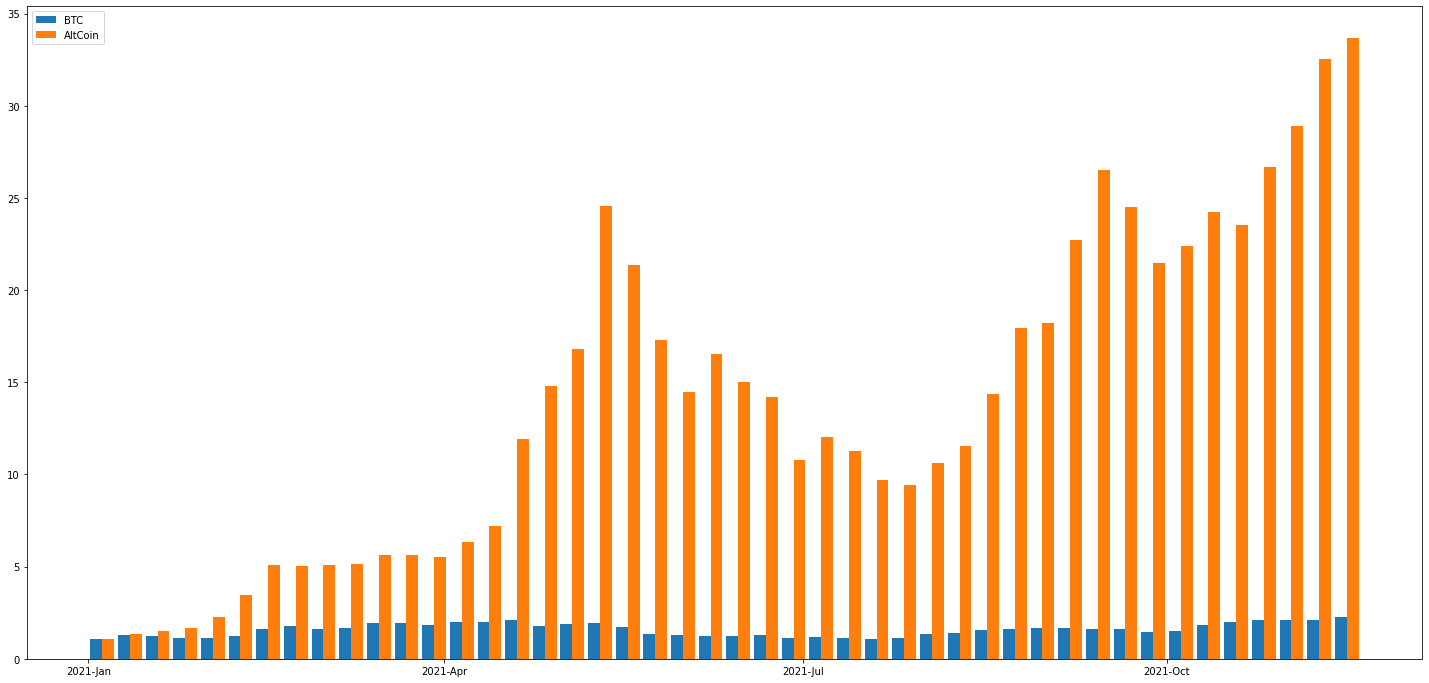

In [16]:
atlCoinIndexWeekly = atlCoinIndex.resample('W').mean()
btcBullWeekly = btcBull.resample('W').mean()

def PlotPairs(df1, df1Name, df2, df2Name, colName = 'RelativeClose'):
    width=3
    shift = pd.to_timedelta('3D')
    fig, ax = plt.subplots(figsize=(25,12))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

    ax.bar(df1.index, df1[colName], label=df1Name, width=width)
    ax.bar(df2.index+shift, df2[colName], label=df2Name, width=width)

    plt.legend()
    plt.show()

PlotPairs(btcBullWeekly, 'BTC', atlCoinIndexWeekly, 'AltCoin')

The alt-coins exhibited a massive out-performance.  Plot each alt-coin individually to how distributed or concentrated the contributions where

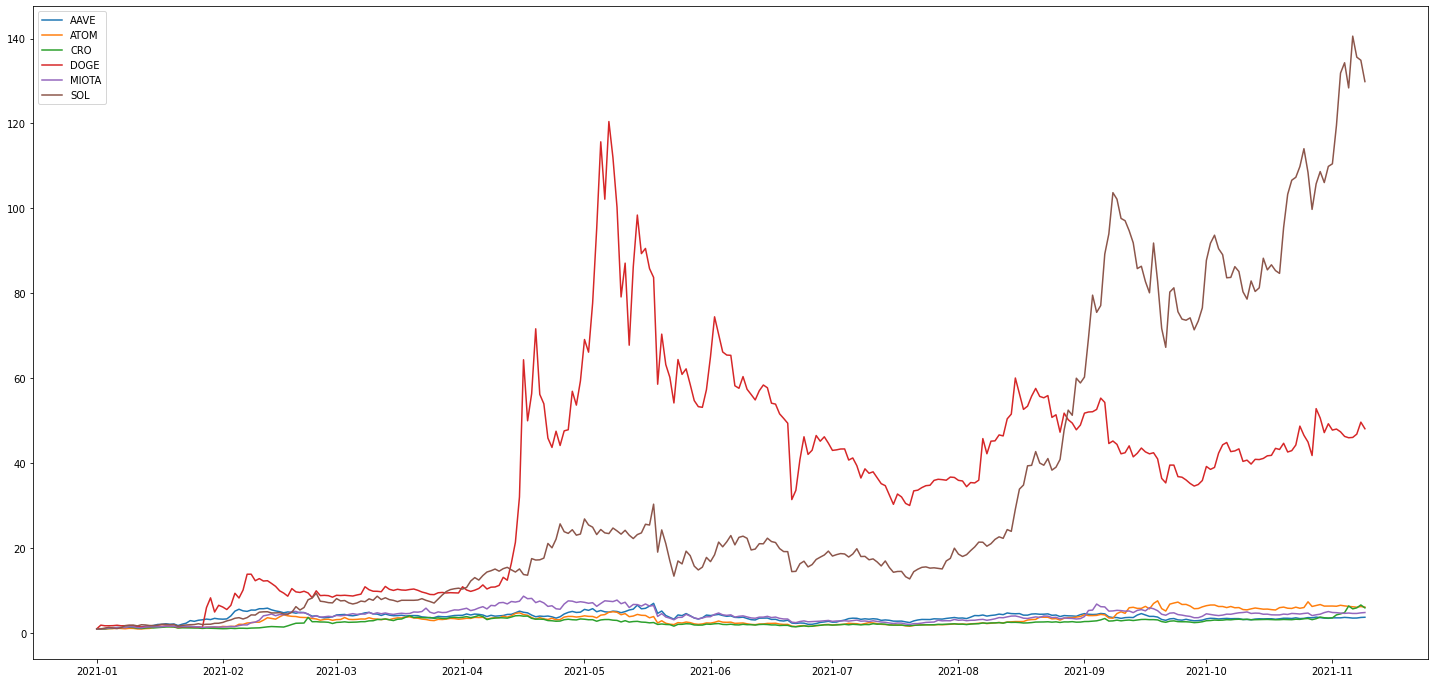

In [17]:
figure(figsize=(25,12))

plt.plot(aaveBull.index, aaveBull.RelativeClose, label = "AAVE")
plt.plot(atomBull.index, atomBull.RelativeClose, label = "ATOM")
plt.plot(croBull.index, croBull.RelativeClose, label = "CRO")
plt.plot(dogeBull.index, dogeBull.RelativeClose, label = "DOGE")
plt.plot(miotaBull.index, miotaBull.RelativeClose, label = "MIOTA")
plt.plot(solBull.index, solBull.RelativeClose, label = "SOL")
plt.legend()
plt.show()

A lot of the performance was delivered by 2 coins- DOGE and SOL.  Repeat the analysis excluding these two coins

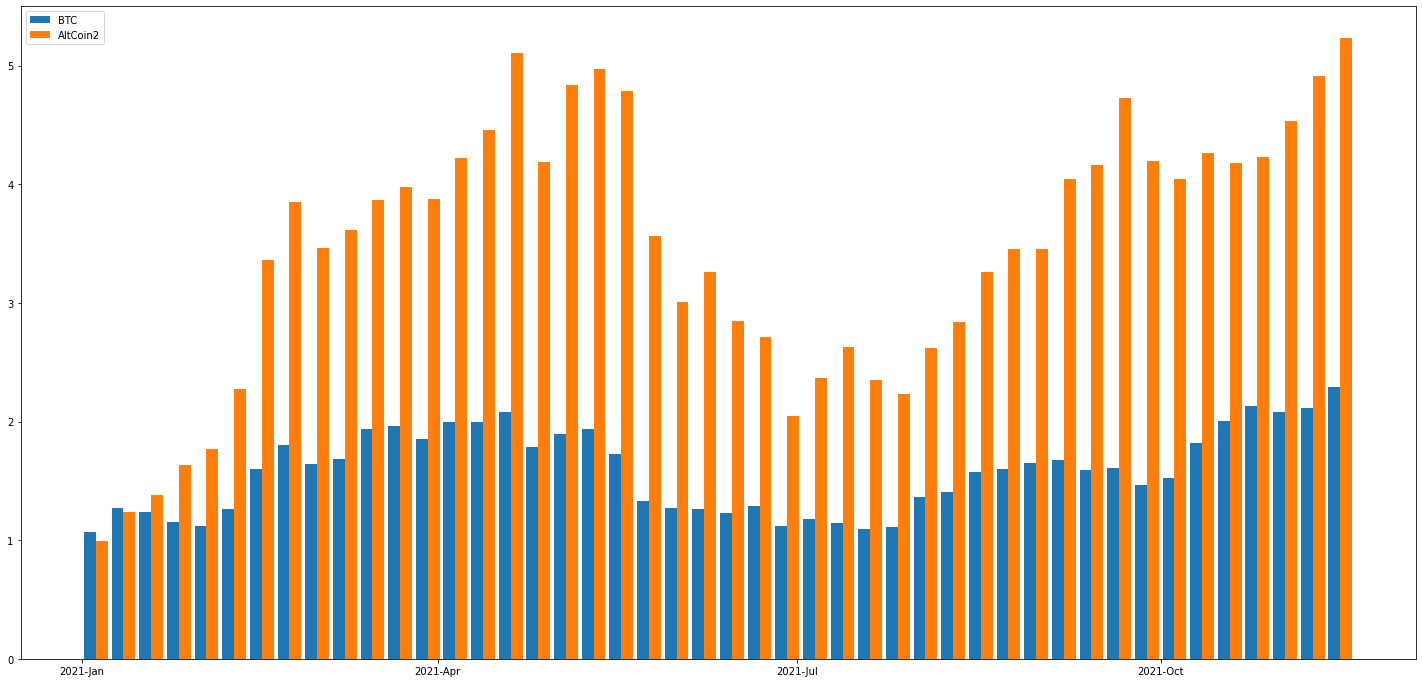

In [18]:
atlCoinIndex2 = ((aaveBull.RelativeClose + atomBull.RelativeClose + croBull.RelativeClose + 
    + miotaBull.RelativeClose) / 4).to_frame('RelativeClose')
atlCoinIndexWeekly2 = atlCoinIndex2.resample('W').mean()
PlotPairs(btcBullWeekly, 'BTC', atlCoinIndexWeekly2, 'AltCoin2')

While the run-up of alt-coins was less spectacular with the two out-performers removed, the relative performance against BTC was still very pronounced.  The relative performance of the other coins was highly correlated, as shown below

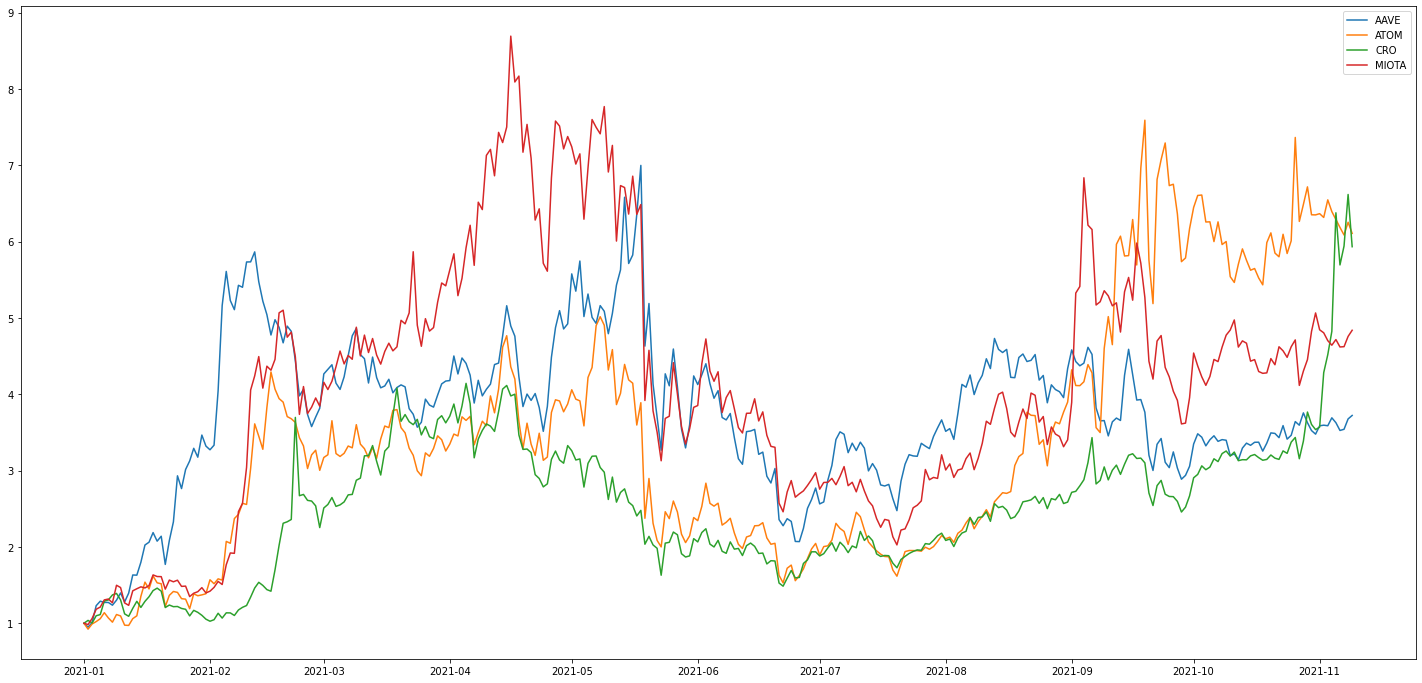

In [19]:
figure(figsize=(25,12))

plt.plot(aaveBull.index, aaveBull.RelativeClose, label = "AAVE")
plt.plot(atomBull.index, atomBull.RelativeClose, label = "ATOM")
plt.plot(croBull.index, croBull.RelativeClose, label = "CRO")
plt.plot(miotaBull.index, miotaBull.RelativeClose, label = "MIOTA")
plt.legend()
plt.show()

## Bear Market

Repeat for the following bear market

In [20]:
def CreateBearMarketDf(df):
    dfBear = df[(df.index > '2021-11-09')].copy()
    dfBear['RelativeClose'] = dfBear.Close / dfBear.Close.iloc[0]
    return dfBear

btcBear = CreateBearMarketDf(btc)

aaveBear = CreateBearMarketDf(aave)
atomBear = CreateBearMarketDf(atom)
croBear = CreateBearMarketDf(cro)
dogeBear = CreateBearMarketDf(doge)
miotaBear = CreateBearMarketDf(miota)
solBear = CreateBearMarketDf(sol)

atlCoinIndexBear = ((aaveBear.RelativeClose + atomBear.RelativeClose + croBear.RelativeClose + 
    dogeBear.RelativeClose + miotaBear.RelativeClose + solBear.RelativeClose) / 6).to_frame('RelativeClose')

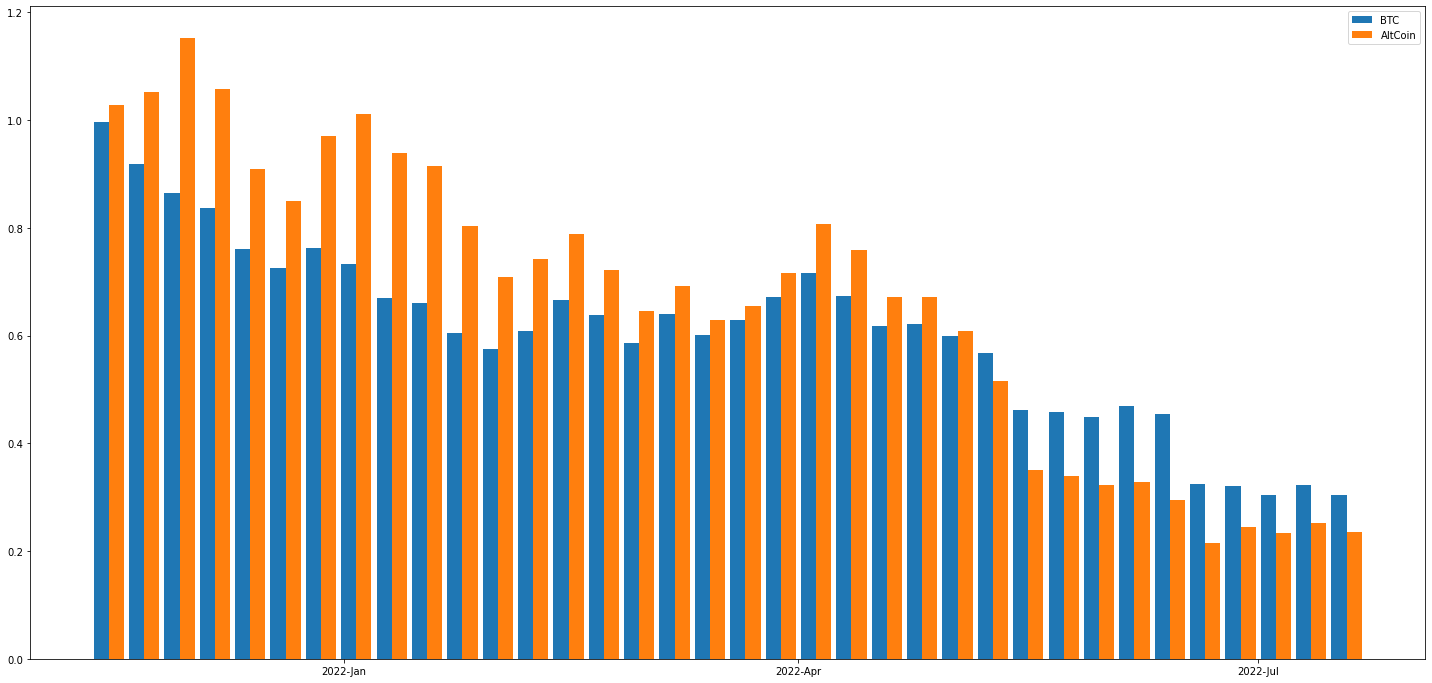

In [21]:
atlCoinBearIndexWeekly = atlCoinIndexBear.resample('W').mean()
btcBearWeekly = btcBear.resample('W').mean()


PlotPairs(btcBearWeekly, 'BTC', atlCoinBearIndexWeekly, 'AltCoin')

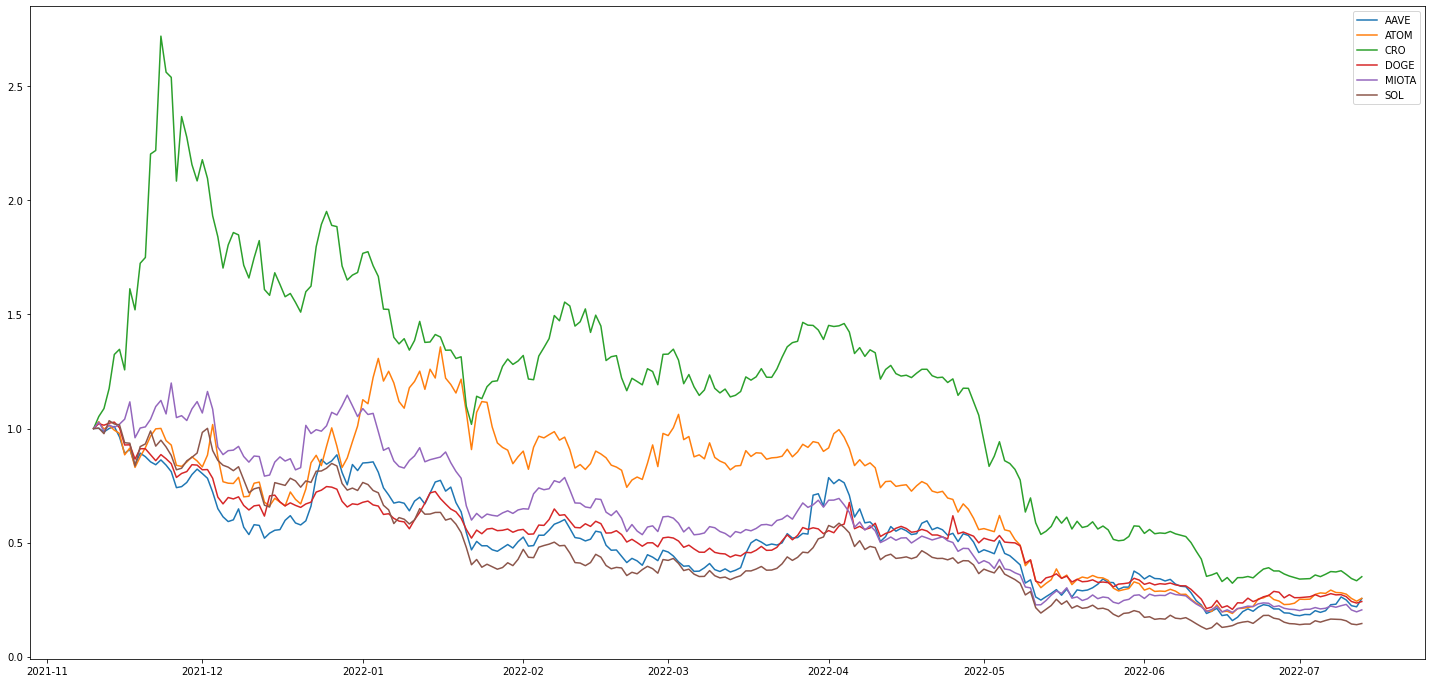

In [22]:
figure(figsize=(25,12))

plt.plot(aaveBear.index, aaveBear.RelativeClose, label = "AAVE")
plt.plot(atomBear.index, atomBear.RelativeClose, label = "ATOM")
plt.plot(croBear.index, croBear.RelativeClose, label = "CRO")
plt.plot(dogeBear.index, dogeBear.RelativeClose, label = "DOGE")
plt.plot(miotaBear.index, miotaBear.RelativeClose, label = "MIOTA")
plt.plot(solBear.index, solBear.RelativeClose, label = "SOL")
plt.legend()
plt.show()

## New Coins Issued
Calculate the expansion of new coins for each of the cryptos from the data their record begins

<AxesSubplot:xlabel='Date'>

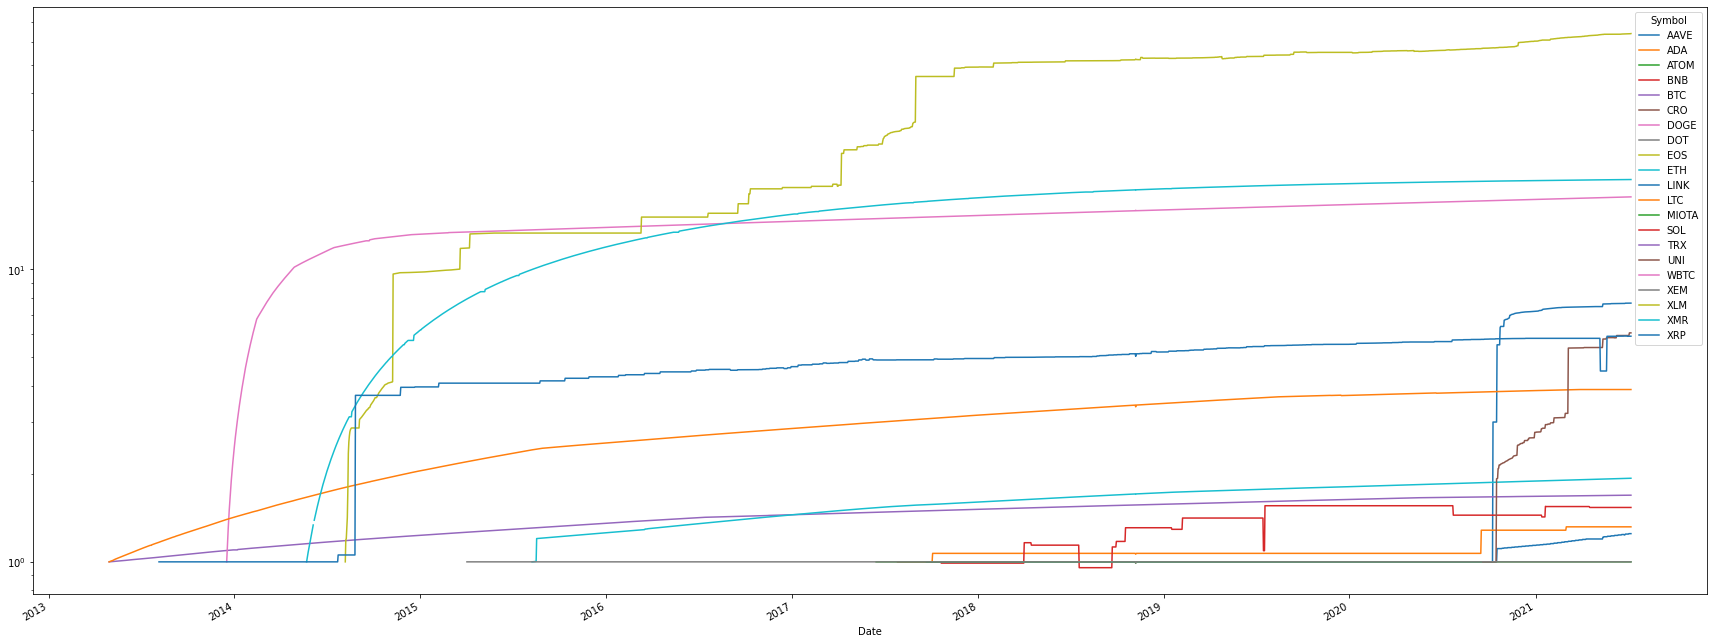

In [23]:
allCryptos['CoinsIssued'] = allCryptos.Marketcap / allCryptos.Close
allCryptosPivot = allCryptos.pivot(index='Date', columns='Symbol', values='CoinsIssued')
allCryptosPivot = allCryptosPivot.drop(columns=['USDT', 'USDC']) #drop stable coins

#scale each column to 1 for the first day that a coin's records start
for column in allCryptosPivot:
    allCryptosPivot[column] = allCryptosPivot[column] / allCryptosPivot[column][~allCryptosPivot[column].isnull()].iloc[0]

allCryptosPivot.plot(kind='line', logy=True, figsize=(30,12))